## Лабораторная работа №4
## Выполнили Смирнов Егор и Максимов Артем

В данной работе мы построили регрессию для 2 датасетов и поработали с параметрами для этой регрессии.

Вначале мы поработали с датасетом о работе электростанции:

In [31]:
import numpy as np
import pandas as pd

In [32]:
ElectricityRaw = pd.read_csv('electricity.csv')
stats = ElectricityRaw.describe()
stats

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [33]:
ElectricityData = ElectricityRaw[['AT','V','AP', 'RH']].copy()
ElectricityPredict = ElectricityRaw['PE'].copy()

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet#У всех методов есть вариант с CrossValidation - LassoCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

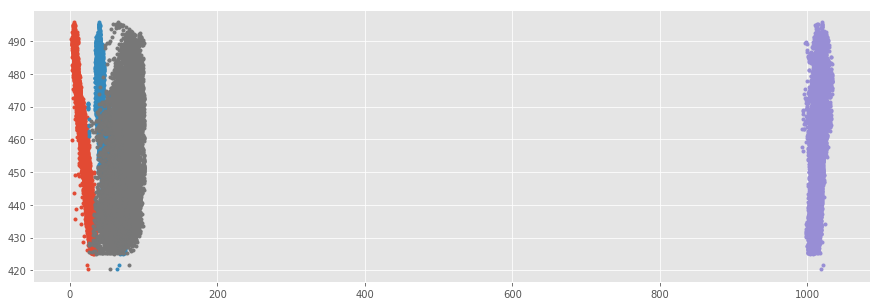

In [38]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

Data = ElectricityData.values.reshape(-1,4)
plt.plot(Data, ElectricityPredict, 'o', markersize=3)
plt.show()

In [39]:
deg = 4
pol = PolynomialFeatures(degree = deg)
El_pol = pol.fit_transform(X = Data)
model = LinearRegression()#fit_intercept - учитывать b0 или нет
model.fit(El_pol, ElectricityPredict)#обучить модель

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

[ 8.11529749e-03 -1.11527819e-01 -3.08562250e-01  5.89595119e-02
 -1.50454337e-01 -8.84062583e+01 -1.51361833e+02  1.29270318e+01
 -5.82395040e+01  1.21523628e+02 -8.78915667e+00 -1.66040431e+01
 -3.97895918e-01  5.75081683e-01  4.74069818e+00 -2.34375180e-01
  6.50839843e-01  1.63600841e-01 -8.70191213e-02 -1.16795324e-01
  2.72500948e-01  1.70965748e-01 -2.48207500e-02  1.17205835e-01
 -4.04756787e-02 -2.78041198e-02 -2.31524307e-01 -7.68364857e-03
  1.73771985e-02  2.58755562e-02  2.62068221e-02  4.43010148e-04
 -1.02871101e-03 -8.94589267e-03 -2.97809712e-03 -1.82579203e-04
  1.63793267e-04  2.34681887e-04  4.18979656e-06 -1.68779286e-04
 -6.31865087e-04  1.80717884e-05 -7.54464260e-05  8.08906454e-05
  1.23216890e-05  5.70458763e-05  1.14935221e-04 -6.00953223e-05
 -1.21966961e-04 -1.62326020e-04  8.37509885e-06  1.19063626e-05
 -5.87285524e-05  3.59705937e-05  1.29576771e-05 -7.91971950e-06
  2.80250692e-05  1.00885120e-05  1.10057537e-04  7.81900059e-06
 -7.77545510e-06 -8.58005

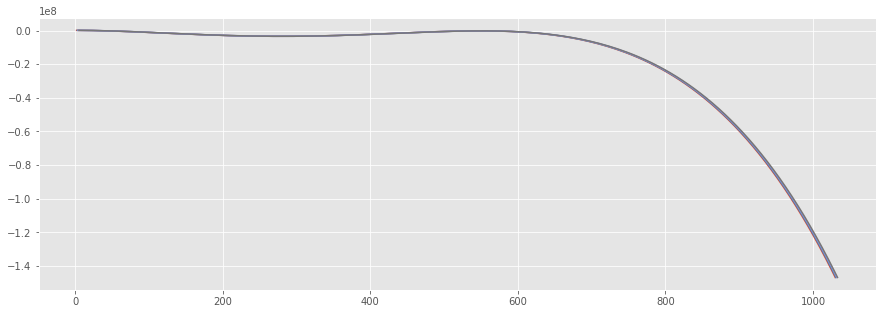

In [40]:
regression_x = np.linspace(Data.min(), Data.max(), 1000)
regression_x = regression_x.reshape(-1, 4)
regression_x_pol = pol.transform(X = regression_x)
regression_y = model.predict(regression_x_pol)

plt.plot(regression_x, regression_y)
print(model.coef_, model.intercept_)
plt.show()

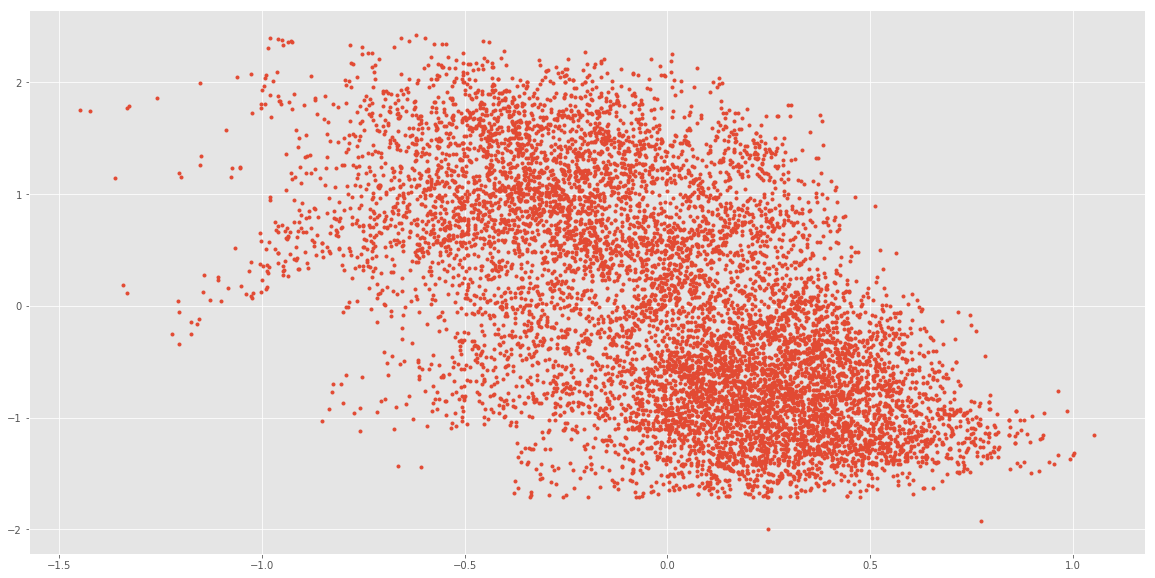

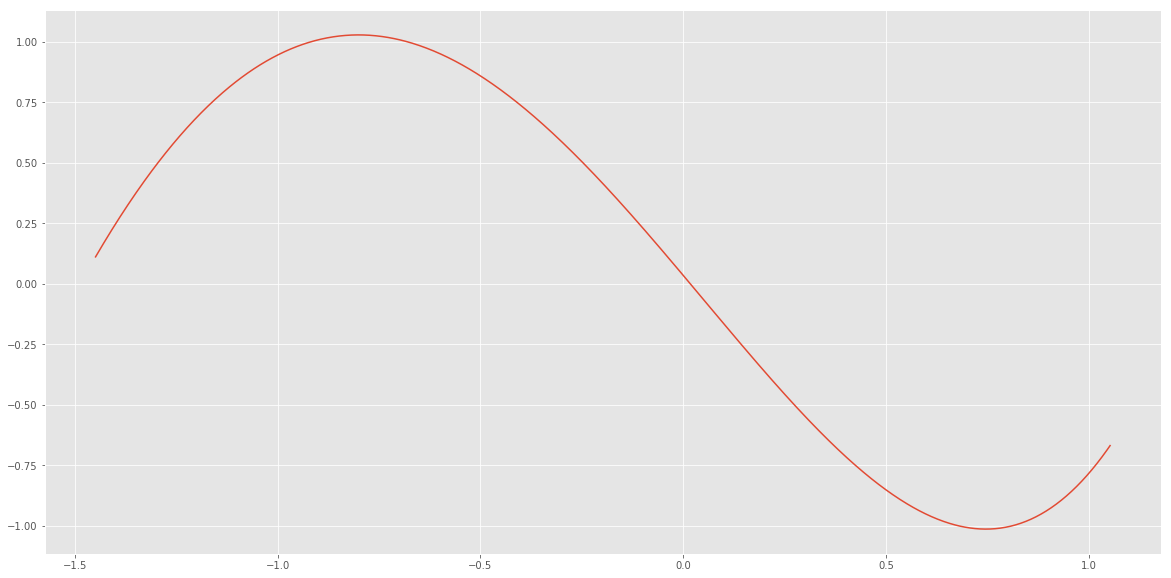

In [71]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet#У всех методов есть вариант с CrossValidation - LassoCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

ElectricityRaw = pd.read_csv('electricity.csv')
ElectricityData = ElectricityRaw[['AT','V','AP', 'RH']].copy()
ElectricityPredict = ElectricityRaw['PE'].copy()

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ElectricityData.values)
DataScaled = scaler.transform(ElectricityData.values, copy=True)
DataScaled2 = np.mean(DataScaled, axis = 1)#усредненные точки после скейелера

ELP2 = ElectricityPredict.values.reshape(-1,1)
scaler.fit(ELP2)
DataScaledY = scaler.transform(ELP2, copy = True)#скейленные точки У

plt.plot(DataScaled2, DataScaledY, 'o', markersize=3)
plt.show()

deg = 4
pol = PolynomialFeatures(degree = deg)
DataScaled3 = DataScaled2.reshape(-1,1)
El_pol = pol.fit_transform(X = DataScaled3)
model = LinearRegression()#fit_intercept - учитывать b0 или нет
model.fit(El_pol, DataScaledY)#обучить модель

regression_x = np.linspace(DataScaled2.min(), DataScaled2.max(), 1000)
regression_x = regression_x.reshape(-1, 1)
regression_x_pol = pol.transform(X = regression_x)
regression_y = model.predict(regression_x_pol)

plt.plot(regression_x, regression_y)
#print(model.coef_, model.intercept_)
plt.show()

In [58]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet#У всех методов есть вариант с CrossValidation - LassoCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

ElectricityRaw = pd.read_csv('electricity.csv')
ElectricityData = ElectricityRaw[['AT','V','AP', 'RH']].copy()
ElectricityPredict = ElectricityRaw['PE'].copy()

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ElectricityData.values)
DataScaled = scaler.transform(ElectricityData.values, copy=True)
Data2 = np.mean(DataScaled, axis = 1)
Data2

array([ 0.04853827,  0.39754913, -0.50488821, ...,  0.14048362,
        0.29826112,  0.3010144 ])